In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from calendar import month_name as mn



# Abstract

En el siguiente trabajo, se examina un dataset que contiene diez mil ordenes de compras para una megatienda en estados, con datos acerca del tipo de consumidor, rentabilidad de cada orden, region de la orden, etc. Con estos datos, podemos comprobar las siguientes hipotesis:

1. El periodo del año afecta a la cantidad de compras
2. La rentabilidad en general de una region es afectado por la cantidad de compras.
3. Los productos de tecnologia tienen mayor varianza en cuanto a la rentabilidad.

In [3]:
superstore_orders = pd.read_excel('./Datasets/Superstore.xlsx')

# Dataset que contiene ordenes de compra de una megatienda en estados unidos.
superstore_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
for column in superstore_orders.columns:
    print("{0:<15}-> {1:>4}".format(column, superstore_orders[column].nunique()))

Row ID         -> 9994
Order ID       -> 5009
Order Date     -> 1238
Ship Date      -> 1334
Ship Mode      ->    4
Customer ID    ->  793
Customer Name  ->  793
Segment        ->    3
Country        ->    1
City           ->  531
State          ->   49
Postal Code    ->  631
Region         ->    4
Product ID     -> 1862
Category       ->    3
Sub-Category   ->   17
Product Name   -> 1841
Sales          -> 5825
Quantity       ->   14
Discount       ->   12
Profit         -> 7287


In [4]:
superstore_orders.drop(['Row ID', 'Order ID', 'Product ID', 'Postal Code', 'Country', 'Customer ID', 'Product Name'], axis=1, inplace=True)

superstore_orders.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2013-06-13,2013-06-17,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
superstore_orders.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,229.858001,3.789574,0.156203,28.656896
min,2011-01-04 00:00:00,2011-01-08 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2014-12-31 00:00:00,2015-01-06 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


# Ventas Por Estado

<BarContainer object of 49 artists>

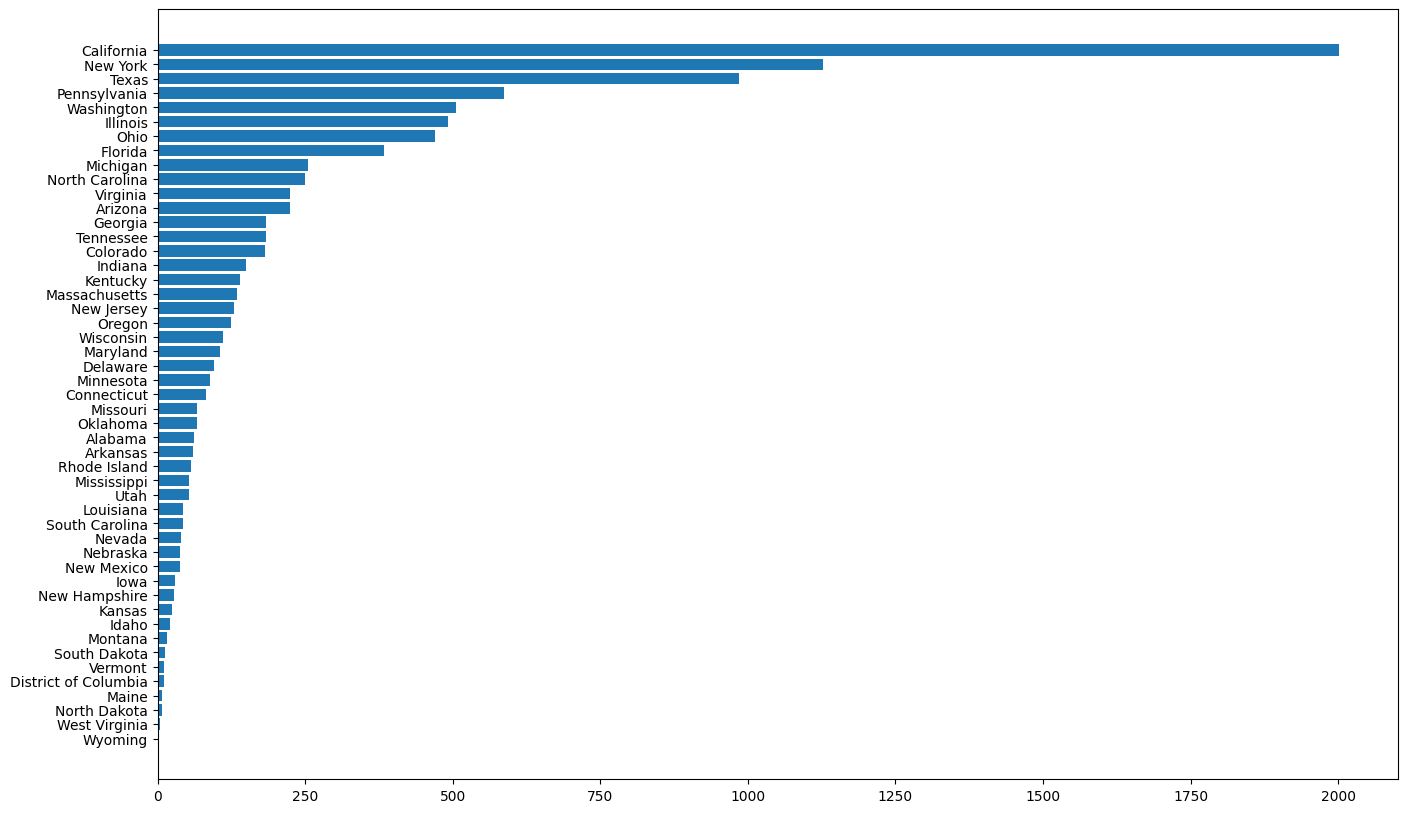

In [6]:
orders_amt = superstore_orders.groupby('State').count().sort_values(by='Sales', ascending=True)

fig, ax = plt.subplots(figsize=(16, 10))

ax.barh(orders_amt.index, orders_amt['Sales'])

# Rentabilidad por Estado

<BarContainer object of 49 artists>

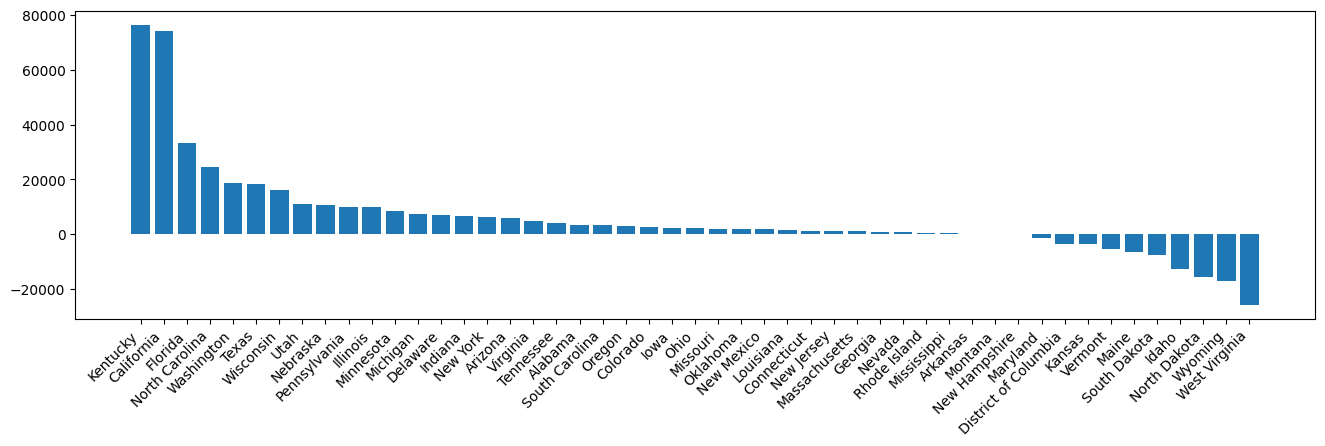

In [7]:
states = superstore_orders['State'].unique()
profits = superstore_orders.groupby('State')['Profit'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,4))
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(ha='right')

ax.bar(states, profits, width=0.8)

Despues, miramos a la rentabilidad por cada estado, que obtenemos tomando la suma de rentabilidad de cada compra. Observamos que los estados menos rentables son North Dakota, Wyoming y West Virginia. Tambien observamos que la rentabilidad cae rapidamente despues del primer lugar.

# Ventas en Relacion a Rentabilidad

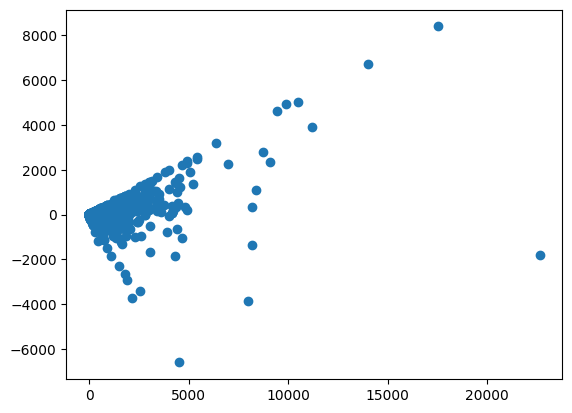

In [8]:
fig, ax = plt.subplots()

ax.scatter(superstore_orders['Sales'], superstore_orders['Profit'])

Miramos ahora al volumen de ventas contra rentabilidad. Aqui observamos que las ordenes mas rentables tienen el mayor volumen de ventas. Pero las menos rentables tambien tienen un alto volumen de venta! Y la mayoria cae en el medio.

# Rentabilidad contra porcentaje de descuento

<Figure size 640x480 with 0 Axes>

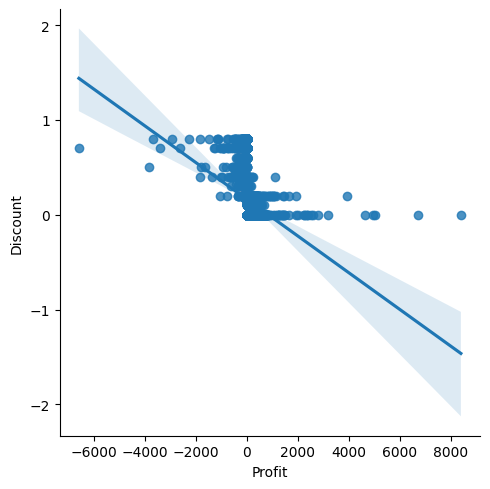

In [9]:
f = plt.figure()
sns.lmplot(data=superstore_orders, x='Profit', y='Discount')

Aqui revisamos a la relacion entre el porcentaje del descuento sobre la orden de compra y la rentabilidad de la compra, y observamos mientras mayor sea el descuento, menor es la rentabilidad.

# Ventas por fecha

/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-

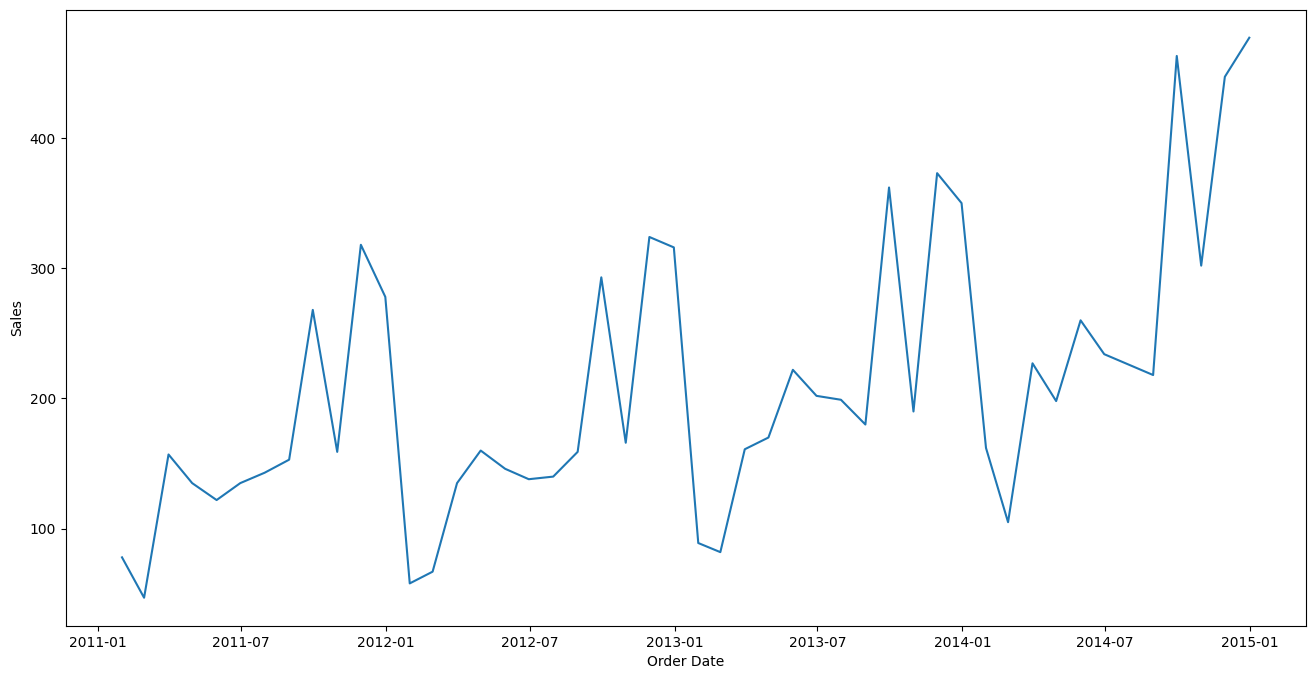

In [10]:
monthly_sales = superstore_orders.set_index('Order Date').groupby(pd.Grouper(freq='M')).count()

plt.figure(figsize=(16, 8))
monthly_fig = sns.lineplot(data=monthly_sales, x='Order Date', y='Sales')

Aqui miramos al volumen de ventas por fecha, y se observa que hay un aumento en general al final del año, correspondiente a la epoca de fiestas navideñas.

# Rentabilidad por Region y Categoria

/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gate/prog/DataScience/Ocando_ProyectoDataScience/.venv/lib/python3.11/site-packages/s

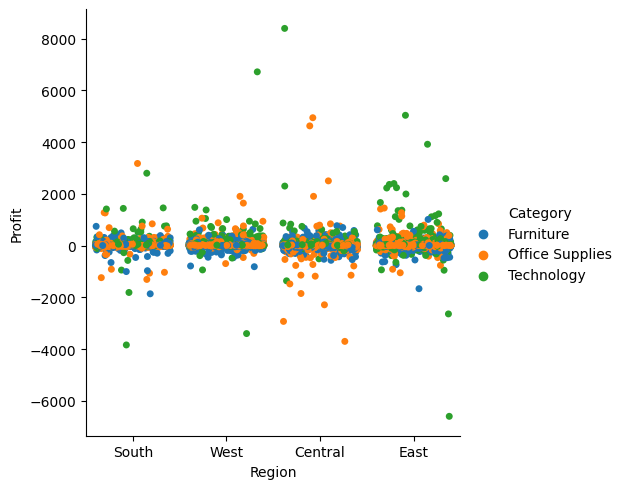

In [11]:
sns.catplot(data=superstore_orders, x='Region', y='Profit', jitter=0.4, hue='Category')

Aqui se mira a la rentabilidad por region, con la categoria indicada por el color. Observamos que la region Central tiene la mayor desviacion en rentabilidad, mientras que la region Oeste tiene la menor desviacion. Al mismo tiempo, se observa que los productos tecnologicos y los productos de oficina son los que tienen el mayor margen de rentabilidad, mientras que los muebles suelen estar mas al centro de rentabilidad.